
# Yield Spread Analysis: Credit Spreads, Liquidity Spreads, and Risk Premiums

## Overview
Yield spreads are differences in yield between fixed income securities of varying credit quality, liquidity, or maturity. Analyzing yield spreads provides insights into credit risk, market liquidity, and investor risk appetite.

In this notebook, we will examine:
- **Credit Spreads**: Yield differences between corporate bonds and government bonds, reflecting credit risk.
- **Liquidity Spreads**: Differences in yield due to variations in bond liquidity.
- **Risk Premiums**: Additional yield required by investors for bearing extra risk.

We'll use data from `yfinance` and hypothetical data to illustrate these concepts.



## 1. Data Retrieval

We'll use `yfinance` to download historical data for U.S. Treasury bonds and corporate bonds to analyze yield spreads. The difference between Treasury yields (considered risk-free) and corporate bond yields represents the credit spread.


[*********************100%***********************]  1 of 1 completed


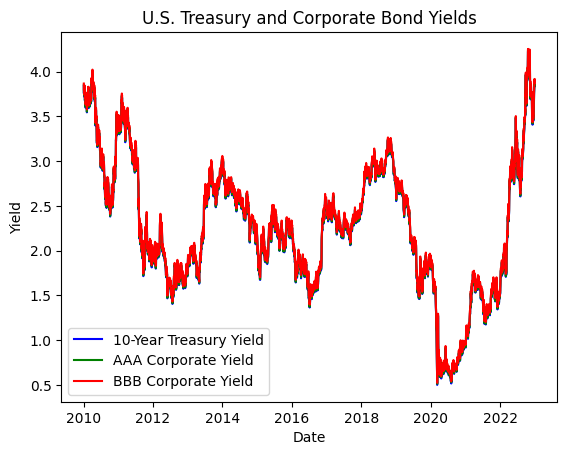

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Download historical data for the U.S. 10-year Treasury yield
data_treasury = yf.download("^TNX", start="2010-01-01", end="2023-01-01")

# Simplify the DataFrame by removing the MultiIndex
data_treasury.columns = data_treasury.columns.get_level_values(0)

# Remove NaN values and set the dates index
data_treasury = data_treasury.dropna(subset=['Close'])
dates = data_treasury.index  

# Generate hypothetical yields for AAA and BBB corporate bonds
np.random.seed(0)
aaa_yields = data_treasury['Close'] + np.random.normal(0.01, 0.002, len(data_treasury['Close']))
bbb_yields = data_treasury['Close'] + np.random.normal(0.03, 0.004, len(data_treasury['Close']))

# Plot yield data
plt.plot(dates, data_treasury['Close'], label="10-Year Treasury Yield", color='blue')
plt.plot(dates, aaa_yields, label="AAA Corporate Yield", color='green')
plt.plot(dates, bbb_yields, label="BBB Corporate Yield", color='red')
plt.xlabel("Date")
plt.ylabel("Yield")
plt.title("U.S. Treasury and Corporate Bond Yields")
plt.legend()
plt.show()



## 2. Credit Spreads

Credit spreads measure the difference in yield between corporate bonds and government bonds. A widening credit spread indicates increased credit risk or economic uncertainty, as investors demand higher yields to compensate for added risk.

Let's calculate the spreads between AAA corporate bonds, BBB corporate bonds, and Treasury bonds.


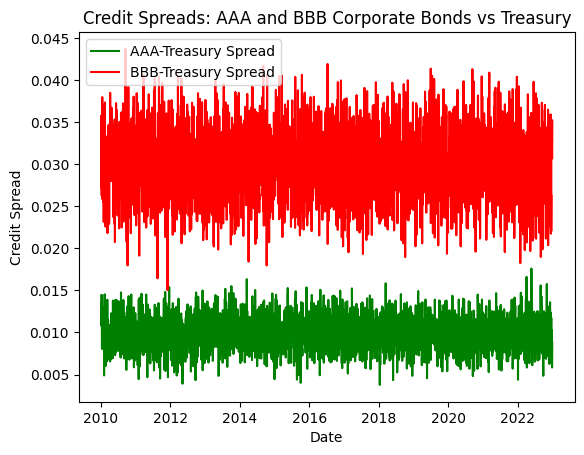

In [12]:

# Calculate credit spreads
credit_spread_aaa = aaa_yields - data_treasury['Close']
credit_spread_bbb = bbb_yields - data_treasury['Close']

# Plot credit spreads
plt.plot(dates, credit_spread_aaa, label="AAA-Treasury Spread", color='green')
plt.plot(dates, credit_spread_bbb, label="BBB-Treasury Spread", color='red')
plt.xlabel("Date")
plt.ylabel("Credit Spread")
plt.title("Credit Spreads: AAA and BBB Corporate Bonds vs Treasury")
plt.legend()
plt.show()



## 3. Liquidity Spreads

Liquidity spreads are yield differences arising due to varying levels of market liquidity between bonds. Typically, government bonds are more liquid than corporate bonds, especially lower-rated bonds.

Liquidity spreads often widen during times of market stress, reflecting increased demand for liquid assets.


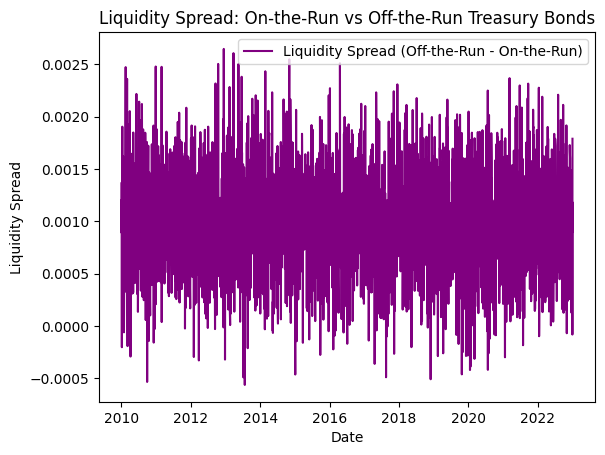

In [13]:

# Hypothetical data for a liquidity spread (difference between on-the-run and off-the-run Treasuries)
on_the_run = data_treasury['Close']
off_the_run = data_treasury['Close'] + np.random.normal(0.001, 0.0005, len(dates))  # Slightly higher yields

# Calculate liquidity spread
liquidity_spread = off_the_run - on_the_run

# Plot liquidity spread
plt.plot(dates, liquidity_spread, label="Liquidity Spread (Off-the-Run - On-the-Run)", color='purple')
plt.xlabel("Date")
plt.ylabel("Liquidity Spread")
plt.title("Liquidity Spread: On-the-Run vs Off-the-Run Treasury Bonds")
plt.legend()
plt.show()



## 4. Risk Premiums

Risk premiums are additional yields required by investors to compensate for risks such as credit risk, interest rate risk, and liquidity risk. The spread between high-yield bonds (e.g., BBB) and risk-free bonds (Treasuries) represents the risk premium.

Let's calculate and visualize the risk premium for BBB bonds over Treasury bonds.


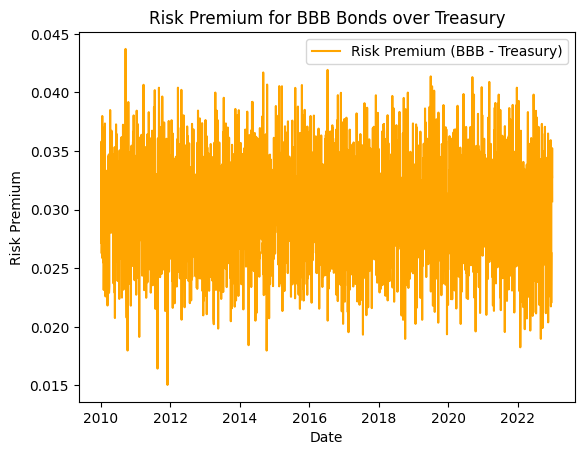

In [14]:

# Calculate risk premium for BBB-rated bonds over Treasury
risk_premium_bbb = bbb_yields - data_treasury['Close']

# Plot risk premium
plt.plot(dates, risk_premium_bbb, label="Risk Premium (BBB - Treasury)", color='orange')
plt.xlabel("Date")
plt.ylabel("Risk Premium")
plt.title("Risk Premium for BBB Bonds over Treasury")
plt.legend()
plt.show()



## Summary

In this notebook, we covered:

- **Credit Spreads**: Yield differences between corporate and government bonds, representing credit risk.
- **Liquidity Spreads**: Yield differences due to variations in bond liquidity, often widening during market stress.
- **Risk Premiums**: Additional yield required by investors for higher-risk bonds, calculated as the spread between BBB-rated bonds and Treasury yields.

Yield spread analysis provides insights into market risk, economic conditions, and investor sentiment, making it a valuable tool for fixed income analysis and portfolio management.
